In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rc
#rc('text', usetex=False) # para usar latex en matplotlib
from matplotlib import animation # animaciones
import numpy as np
from scipy.sparse import diags, kron, csr_matrix, csc_matrix
from scipy.sparse.linalg import spsolve, norm, inv, eigsh
import pandas as pd
import scipy as sp

*Universidad de Chile*  
*Facultad de Ciencias Físicas y Matemáticas*  
*Departamento de Ingeniería Matemática*

**MA5307-1 Análisis Numérico de EDP: Teoría y Laboratorio**  
**Profesor:** Axel Osses  
**Auxiliares:** Emir Chacra

**Integrantes:** Sebastián Cobaise;
                 Arturo Lazcano; Benjamín Tardy D.

# Laboratorio 3

El objetivo de este laboratorio es entender e implementar un esquema numérico basado en elementos finitos de Lagrange para una ecuacion elíptica de segundo orden en una dimensión con condiciones de frontera Dirichlet.

Sean $\alpha,\beta,u_{\alpha},u_{\beta}\in\mathbb{R}$, $\varepsilon>0$,
$\Omega=\left(  \alpha,\beta\right)  $, $a\in W^{1,\infty}\left(
\Omega\right)  $, $b\in L^{\infty}\left(  \Omega\right)  $ y $f\in
L^{2}\left(  \Omega\right)  $. 

Considere la siguiente ecuación de difusión-advección-reacción dada por
$\begin{align}
-\varepsilon u^{\prime\prime}+au^{\prime}+bu  &  =f\qquad\text{sobre }%
\Omega\nonumber\\
u\left(  \alpha\right)   &  =u_{\alpha}\tag{P}\\
u\left(  \beta\right)   &  =u_{\beta}\nonumber
\end{align}$

### **Ejercicio 1:**

Programe una funcion que resuelva numéricamente el problema (P) usando el metodo descrito. Las entradas del programa deben ser la discretización $\{x_j\}^{N+1}_{j=0}$ como un vector ordenado, $u_\alpha$,$u_\beta$, $\varepsilon$, $a$, $b$ y $f$. 

La salida de este programa debe ser un vector del mismo tamaño que la discretización con las soluciones discretas del esquema.

In [2]:
def Resuelve(x,ualpha,ubeta,eps,a,b,f):
  N=len(x)-2
  A1=np.zeros((N,N))
  A2=np.zeros((N,N))
  A3=np.zeros((N,N))
  for i in range(N):
    for j in range(N):
      if i==j:
        A1[i,j]=1/(x[i+1]-x[i]) + 1/(x[i+2]-x[i+1])
        A3[i,j]=2*((x[i+1]-x[i])+(x[i+2]-x[i+1]))
      if i==j+1:
        A1[i,j]=-1/(x[i+1]-x[i])
        A2[i,j]=-1/2
        A3[i,j]=(x[i+1]-x[i])
      if j==i+1:
        A1[i,j]=-1/(x[j+1]-x[j])
        A2[i,j]=1/2
        A3[i,j]=(x[j+1]-x[j])
  
  A1=eps*A1
  A2=a*A2
  A3=(b/6)*A3

  A=A1+A2+A3

  fh=np.zeros(N)
  for i in range(N):
    fh[i]=(x[i+2]-x[i+1])*(f(x[i+1])+2*f((x[i+1]+x[i+2])/2))+(x[i+1]-x[i])*(f(x[i+1])+2*f((x[i]+x[i+1])/2))
  fh=(1/6)*fh
  poplolita=np.zeros(N)
  poplolita[0]=(-eps/(x[1]-x[0])-a/2+b/6*(x[1]-x[0]))*ualpha
  poplolita[N-1]=(-eps/(x[N+1]-x[N])+a/2+b/6*(x[N+1]-x[N]))*ubeta

  lado_derecho=fh-poplolita
  u = sp.sparse.linalg.spsolve(A,lado_derecho)
  u1 = np.insert(u,0,ualpha,axis=0)
  u2 = np.insert(u1,N+1,ubeta,axis=0)
  return u2

### **Ejercicio 2:** 
Considere $f\equiv1$, $a=1$, $b=0$ y $\Omega=\left(  0,1\right)  $.

Para $u_{\alpha}=u_{\beta}=0$, la solución analítica de $\textbf{(P)}$ es única e igual a la
función
$$
u(x)=x-\dfrac
{\exp\left(  \frac{x-1}{\varepsilon}\right)  -\exp\left(  -\frac
{1}{\varepsilon}\right)  }{1-\exp\left(  -\frac{1}{\varepsilon}\right)}\hspace{1cm} \forall x\in\left[  0,1\right] 
$$

a. Para una discretización uniforme con $N \in \{5, 10, 20\}$ elementos (es decir, $h_j = h = \frac{1}{N+1}$), calcule la solución numérica cuando $\varepsilon = 1$. Grafique todas las soluciones numéricas y la solución analítica (esta última discretizada en una gran cantidad de puntos equiespaciados) en una misma gráfica. Comente sus observaciones.

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


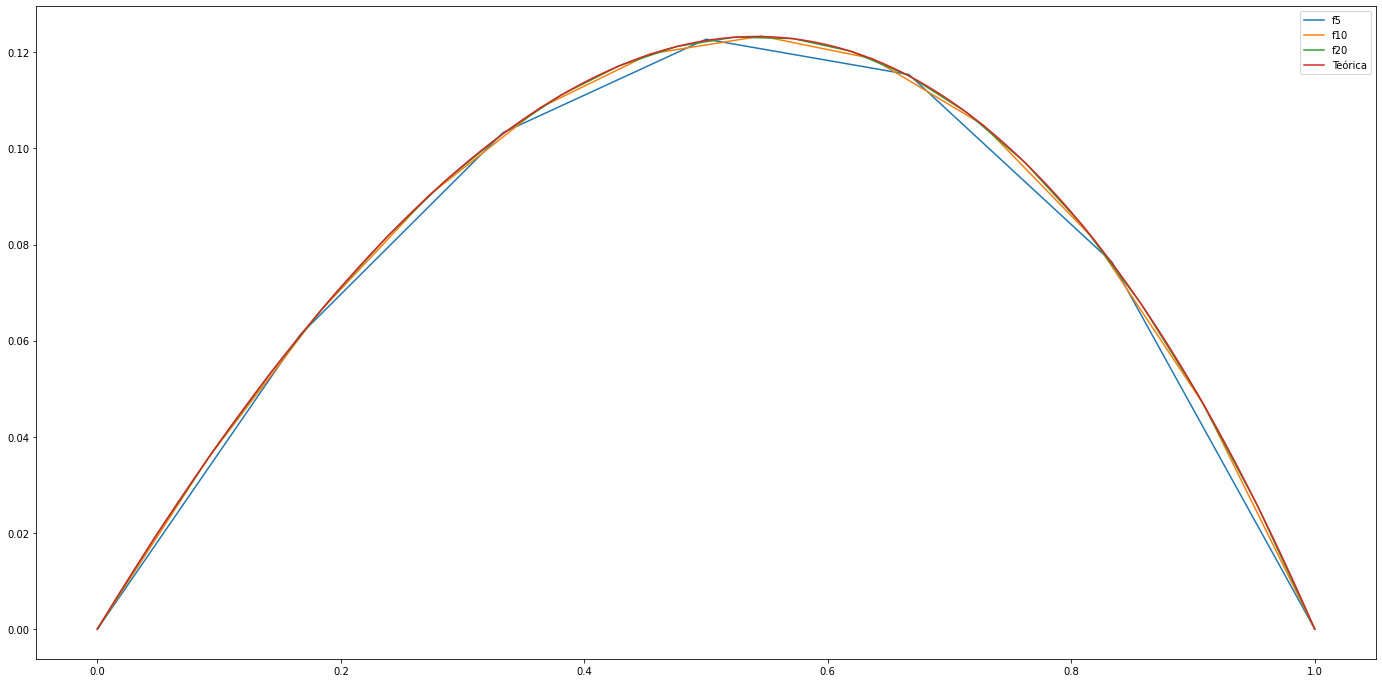

In [ ]:
#Parametros
f = lambda x: 1

eps=1

g = lambda x: x - ((np.exp((x-1)/eps) - (np.exp((-1)/eps)))/(1-np.exp(-1/eps)))

a=1
b=0
ualpha=0
ubeta=0

N1 = 5
N2 = 10
N3 = 20

x1 = np.linspace(a, b, N1+2)
x2 = np.linspace(a, b, N2+2)
x3 = np.linspace(a, b, N3+2)
x4 = np.linspace(a, b, 1000)

u1 = Resuelve(x1,ualpha,ubeta,eps,a,b,f)
u2 = Resuelve(x2,ualpha,ubeta,eps,a,b,f)
u3 = Resuelve(x3,ualpha,ubeta,eps,a,b,f)

h1 = 1/(N1+1)
h2 = 1/(N2+1)
h3 = 1/(N3+1)

x1 = np.linspace(a, b, N1+2) 
x2 = np.linspace(a, b, N2+2)
x3 = np.linspace(a, b, N3+2)

# Definamos una figura para graficar.
fig = plt.figure(figsize=(24, 12)) #Bueno para elegir el porte con figsize
plt.plot(x1, u1, label= 'f5')
plt.plot(x2, u2, label= 'f10')
plt.plot(x3, u3, label= 'f20')
plt.plot(x4, g(x4), label= 'Teórica')
plt.legend()

Se observa que los resultados discretos calculados aproximan de buena manera a la solución analítica cuando $\varepsilon$ = 1. Incluso cuando N=5, aunque la solución es poco fina, los puntos en los que esta está definida se acercan muy bien a la solución teórica. Para N = 20 la diferencia entre esta y la teórica es prácticamente imperceptible.

b. Repita lo anterior para $\varepsilon = 10^{−j}$ , con $j \in \{1, 2, 3\}$ y $N \in \{10, 25, 50, 100, 250, 500, 1000\}$. Gráfique los tres primeros valores de $N$ en una figura, los dos siguientes en una distinta y los últimos dos en otra. 
    
Comente sus observaciones.

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseE

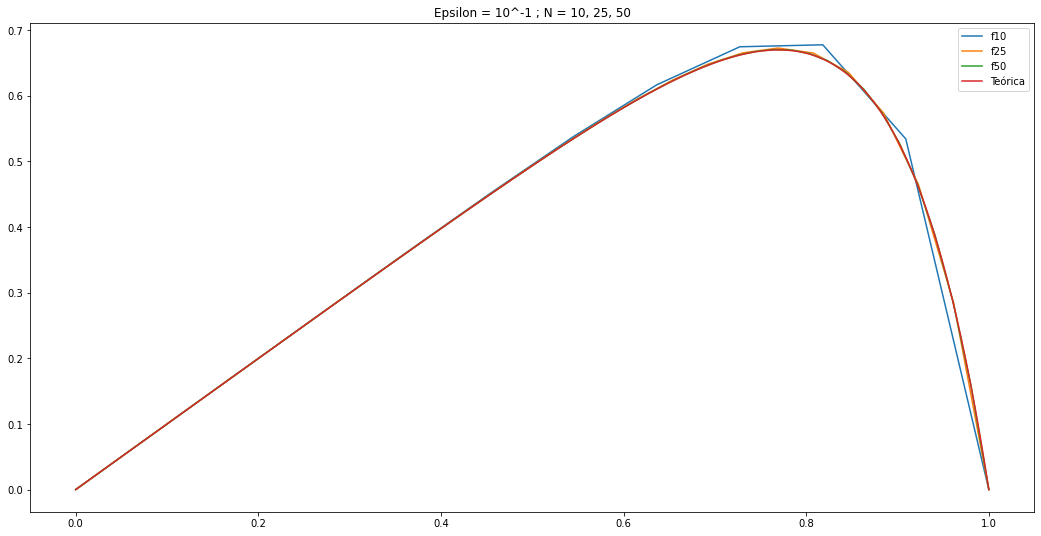

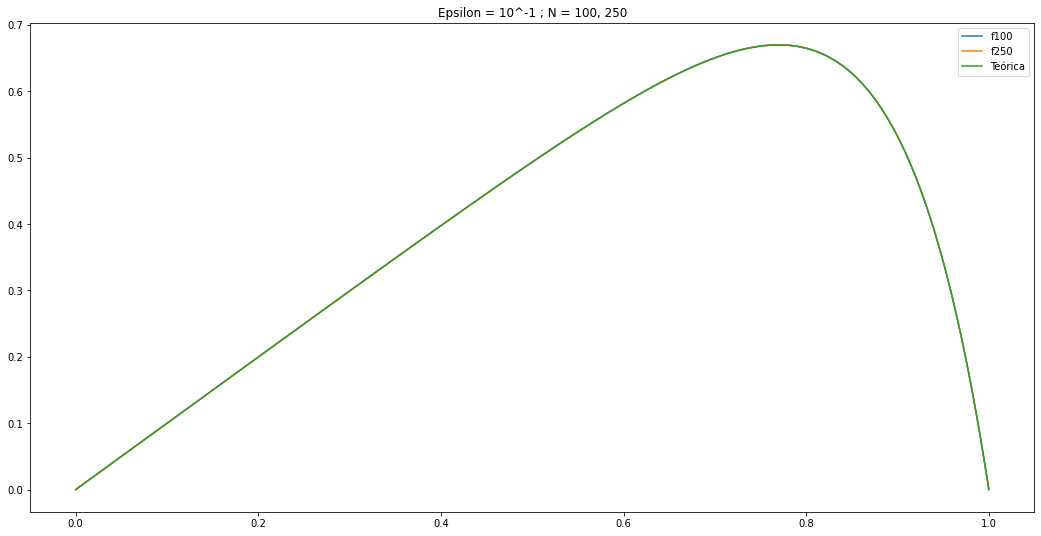

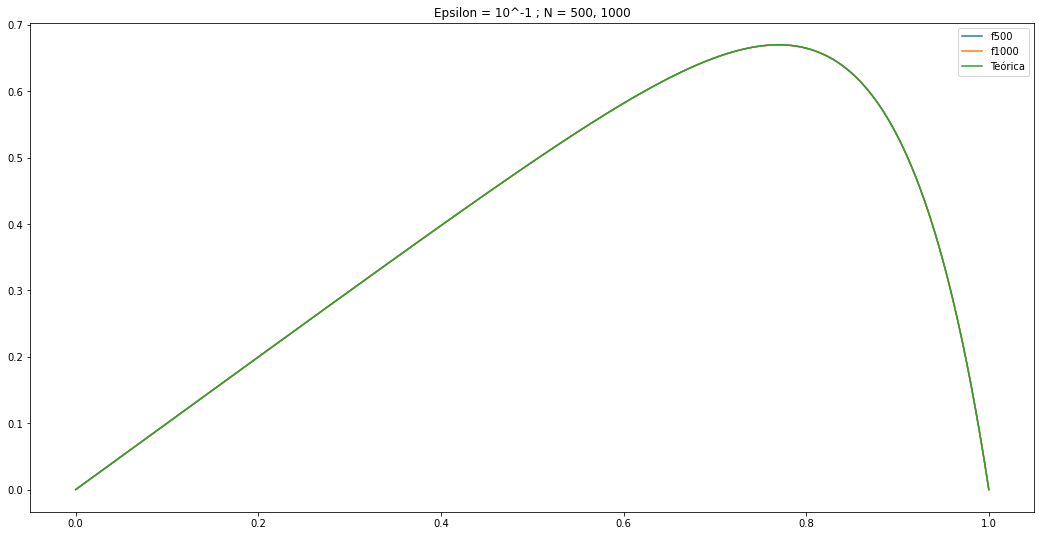

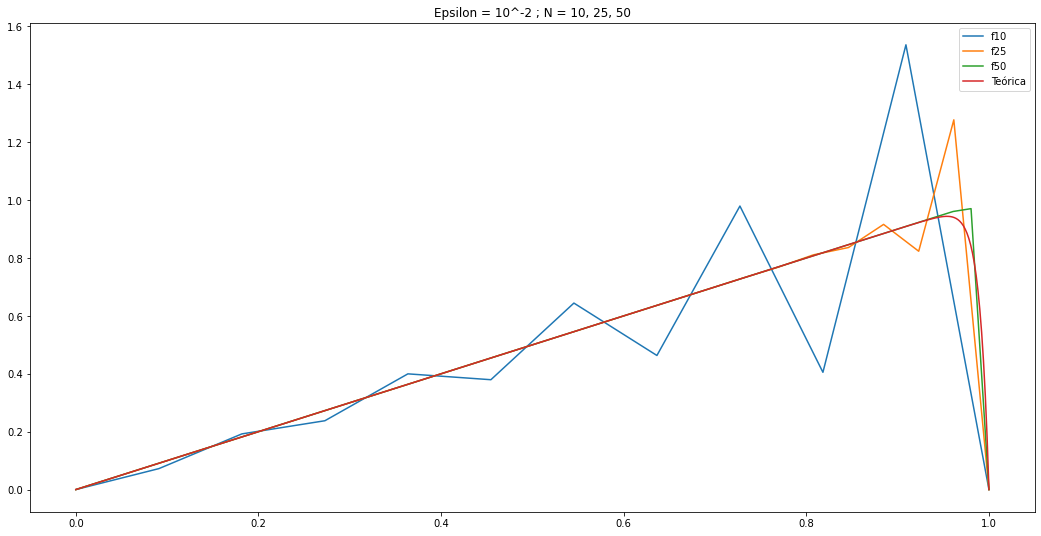

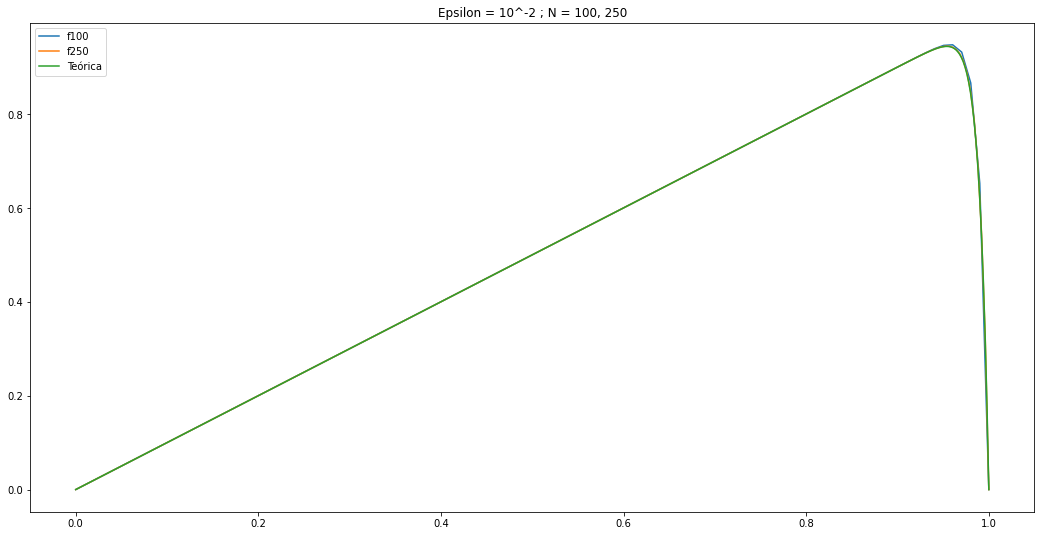

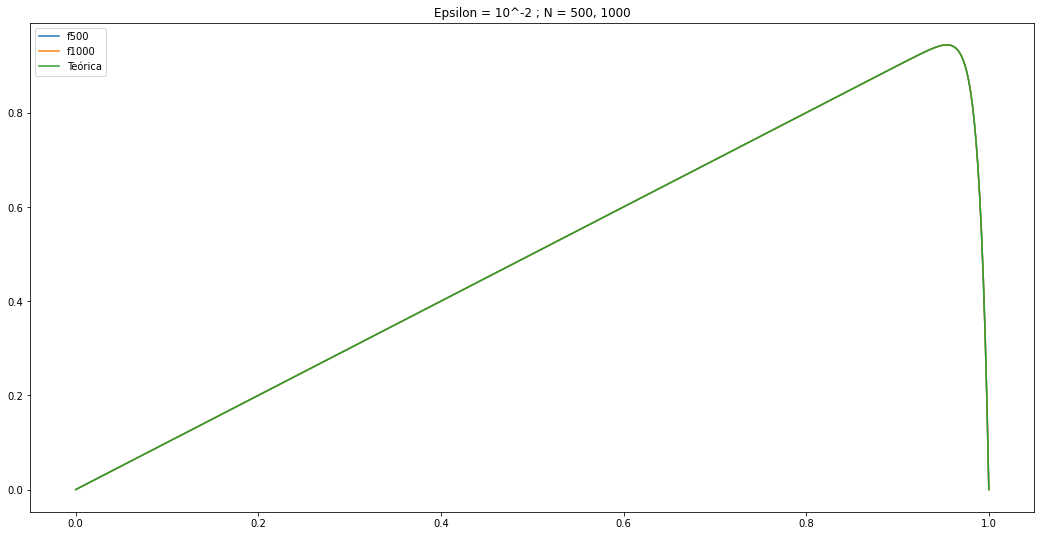

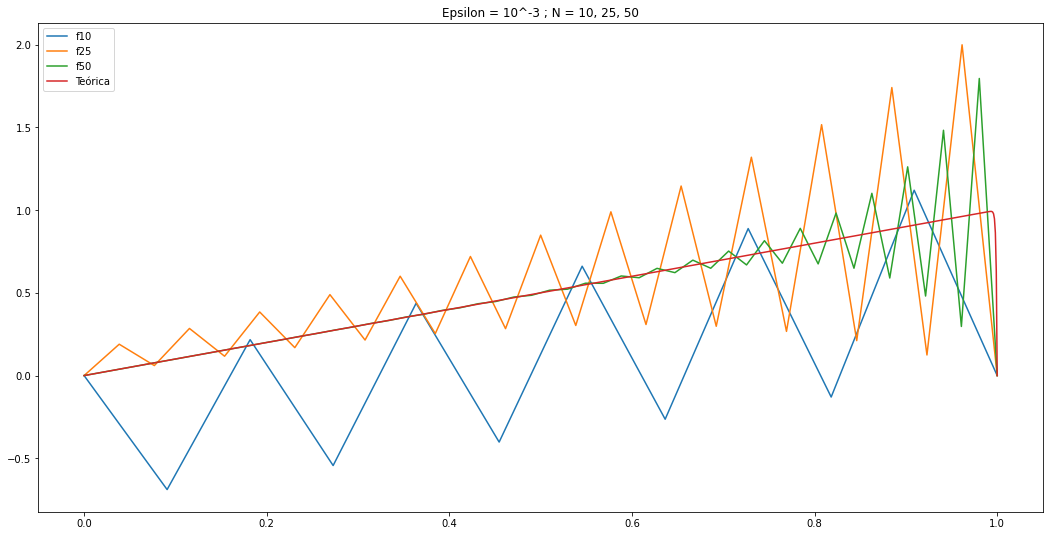

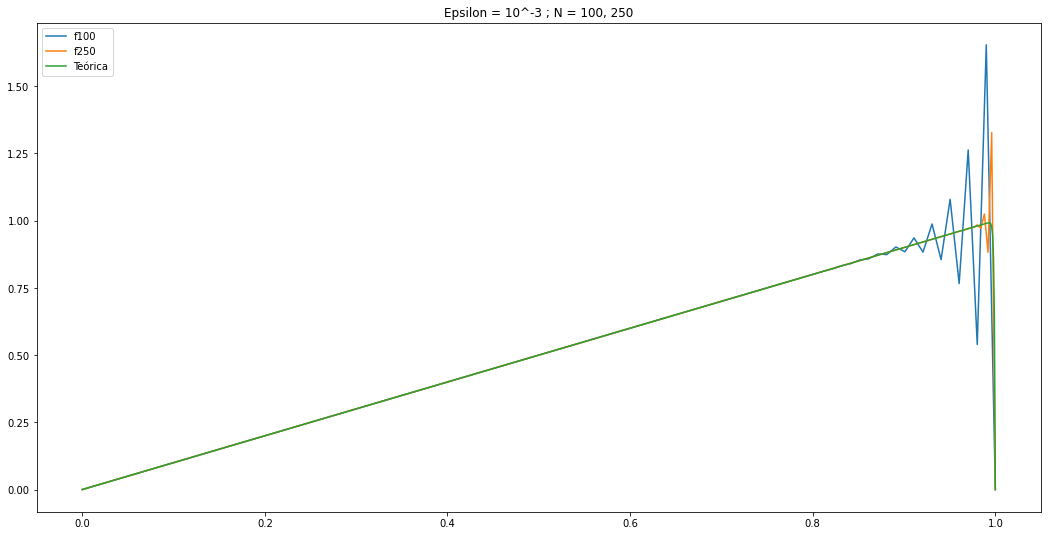

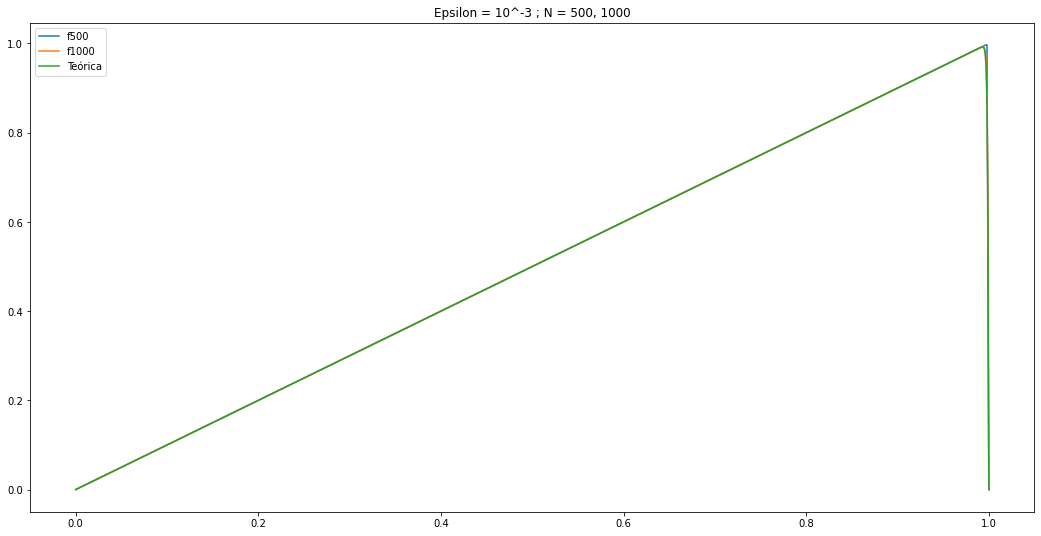

In [ ]:
for j in [1,2,3]:
  #Parametros
  f = lambda x: 1
  eps=10**(-j)
  g = lambda x: x - ((np.exp((x-1)/eps) - (np.exp((-1)/eps)))/(1-np.exp(-1/eps)))
  a=1
  b=0
  ualpha=0
  ubeta=0

  N1 = 10
  N2 = 25
  N3 = 50

  x1 = np.linspace(a, b, N1+2)
  x2 = np.linspace(a, b, N2+2)
  x3 = np.linspace(a, b, N3+2)
  x10 = np.linspace(a, b, 1000)

  u1 = Resuelve(x1,ualpha,ubeta,eps,a,b,f)
  u2 = Resuelve(x2,ualpha,ubeta,eps,a,b,f)
  u3 = Resuelve(x3,ualpha,ubeta,eps,a,b,f)

  # Definamos una figura para graficar.
  fig = plt.figure(figsize=(18, 9)) 
  plt.plot(x1, u1, label= 'f10')
  plt.plot(x2, u2, label= 'f25')
  plt.plot(x3, u3, label= 'f50')
  plt.plot(x10, g(x10), label= 'Teórica')
  plt.title('Epsilon = 10^' + str(-j) + " ; N = 10, 25, 50")
  plt.legend()

  #Parametros

  N4 = 100
  N5 = 250

  x4 = np.linspace(a, b, N4+2)
  x5 = np.linspace(a, b, N5+2)
  
  u4 = Resuelve(x4,ualpha,ubeta,eps,a,b,f)
  u5 = Resuelve(x5,ualpha,ubeta,eps,a,b,f)

  # Definamos una figura para graficar.
  fig = plt.figure(figsize=(18, 9))
  plt.plot(x4, u4, label= 'f100')
  plt.plot(x5, u5, label= 'f250')
  plt.plot(x10, g(x10), label= 'Teórica')
  plt.title('Epsilon = 10^' + str(-j) + " ; N = 100, 250")
  plt.legend()

  #Parametros

  N6 = 500
  N7 = 1000

  x6 = np.linspace(a, b, N6+2)
  x7 = np.linspace(a, b, N7+2)

  u6 = Resuelve(x6,ualpha,ubeta,eps,a,b,f)
  u7 = Resuelve(x7,ualpha,ubeta,eps,a,b,f)

  # Definamos una figura para graficar.
  fig = plt.figure(figsize=(18, 9)) 
  plt.plot(x6, u6, label= 'f500')
  plt.plot(x7, u7, label= 'f1000')
  plt.plot(x10, g(x10), label= 'Teórica')
  plt.title('Epsilon = 10^' + str(-j) + " ; N = 500, 1000")
  plt.legend()

Es posible apreciar que a medida que $ɛ$ se hace cada vez más pequeño, las diferencias existentes entre las soluciones discretas y la solución teórica se comienza a hacer cada vez más notorias. Cuando $ɛ$ = $10^{-1}$, un valor de N mayor a 25 ya entrega un resultado discreto bastante similar al teórico. Cuando $ɛ$ = $10^{-2}$, un valor de N mayor a 100 ya entrega un resultado discreto bastante similar al teórico. Para $ɛ$ = $10^{-3}$, las diferencias comienzan a ser casi imperceptible cuando N toma valores mayores a 500. En conclusión, a medida que el $ɛ$ disminuye se comienzan a necesitar valores de N cada vez más grandes para obtener una solución que satisfactoria. 

##### Estimación del error


**Teorema:** Sean $\alpha,\beta,u_{\alpha},u_{\beta}\in\mathbb{R}$, $\varepsilon>0$,
$\Omega=\left(  \alpha,\beta\right)  $, $a\in W^{1,\infty}\left(
\Omega\right)  $, $b\in L^{\infty}\left(  \Omega\right)  $ y $f\in
L^{2}\left(  \Omega\right)  $. 
Considere $u$ y $u_{h}$ soluciones únicas de (FV) y (FVD), respectivamente. Entonces, existen constantes $C_{0}>0$ y $C_{1}>0$, independientes de $h$, tales que:
$$
\left\Vert u-u_{h}\right\Vert _{0,\Omega}\leq C_{0}h^{2}\hspace{1cm
}\left\vert u-u_{h}\right\vert _{1,\Omega}\leq C_{1}h
$$


Para hacer este cálculo de forma eficiente, se elegirá una regla de cuadratura conveniente. En primer lugar,
$$\left\Vert u-u_{h}\right\Vert _{0,\Omega}^{2}=\sum_{j=1}^{N}\int_{T_{j}%
}\left(  u\left(  x\right)  -u_{h}\right)  ^{2}\text{ }dx
$$
donde $u_{h}$ es de grado a lo más $1$. Aplicando la regla de Simpson, se
tiene que:
$$
\left\Vert u-u_{h}\right\Vert _{0,\Omega}^{2}=\sum_{j=1}^{N}\dfrac{h_{j}}{6}\left[  \left(  u\left(  x_{j}\right)  -u_{j}^{h}\right)  ^{2}+4\left(
u\left(  \bar{x}_{j}\right)  -\dfrac{u_{j}^{h}+u_{j+1}^{h}}{2}\right)
^{2}+\left(  u\left(  x_{j+1}\right)  -u_{j+1}^{h}\right)  ^{2}\right]
+\mathcal{O}\left(  h_{j}^{5}\right)
$$
Luego, repitiendo el mismo análisis, se tiene que:
$$
\left\vert u-u_{h}\right\vert _{1,\Omega}^{2}=\sum_{j=1}^{N}\int_{T_{j}%
}\left(  u^{\prime}\left(  x\right)  -u_{h}^{\prime}\right)  ^{2}\text{ }dx
$$
donde $u_{h}^{\prime}$ es una función constante a trozos. Entonces, aplicando
la regla del punto medio, se cumple que:
$$
\left\vert u-u_{h}\right\vert _{1,\Omega}^{2}=\sum_{j=1}^{N}h_{j}\left(
u^{\prime}\left(  \bar{x}_{j}\right)  -\dfrac{u_{j+1}-u_{j}}{h_{j}}\right)
^{2}+\mathcal{O}\left(  h_{j}^{3}\right)
$$




c. Considere ahora $\varepsilon = 0.01$ y una discretización uniforme con $N \in \{5, 10, 20, 40, 80, 160, 320, 640, 1280\}$ elementos (es decir, $h_j = h = \frac{1}{N}$). Estime el error en las normas $L^2(\Omega)$, $H^1(\Omega)$ y en la seminorma de $H^1(\Omega)$, grafíquelos y tabúlelos en función de $h$. Para ello, cree una función que permita obtener esos errores. Dicha función debe tener como entradas la discretización del dominio, el vector solución del primer ejercicio, la solución real y su derivada. Las salidas deben ser las normas del error en los espacios $L^2(\Omega)$ y $H^1(\Omega)$, y la seminorma del error en el espacio $H^1(\Omega)$. 

Comente sus resultados.
    
**Indicación:** Puede ser útil usar escala logarítmica para la gráfica de errores. Asimismo, puede resultar útil usar curvas de la forma $Ch$ o $Ch^2$ para comparar las curvas de error con sus respectivos ordenes de convergencia.

$$
\left\Vert u-u_{h}\right\Vert _{0,\Omega}^{2}=\sum_{j=1}^{N}\dfrac{h_{j}}{6}\left[  \left(  u\left(  x_{j}\right)  -u_{j}^{h}\right)  ^{2}+4\left(
u\left(  \bar{x}_{j}\right)  -\dfrac{u_{j}^{h}+u_{j+1}^{h}}{2}\right)
^{2}+\left(  u\left(  x_{j+1}\right)  -u_{j+1}^{h}\right)  ^{2}\right]
+\mathcal{O}\left(  h_{j}^{5}\right)
$$

$$
\left\vert u-u_{h}\right\vert _{1,\Omega}^{2}=\sum_{j=1}^{N}h_{j}\left(
u^{\prime}\left(  \bar{x}_{j}\right)  -\dfrac{u_{j+1}-u_{j}}{h_{j}}\right)
^{2}+\mathcal{O}\left(  h_{j}^{3}\right)
$$

In [86]:
#N es el numero de intervalos de la discretizacion
def error_norma2(u_teo,u_disc,N):
  error=0
  h=1/N
  xdisc = np.linspace(0, 1, N+1)
  for i in range(N):
    error+=(h/6)*((u_teo(xdisc[i])-u_disc[i])**2+4*(u_teo((xdisc[i]+xdisc[i+1])/2)-(u_disc[i]+u_disc[i+1])/2)**2+ (u_teo(xdisc[i+1])-u_disc[i+1])**2)
  return np.sqrt(error)

def error_semi_norma1(u_teo,u_disc,derivada,N):
  error=0
  h=1/N
  xdisc = np.linspace(0, 1, N+1)
  for i in range(N):
    error += h*(derivada((xdisc[i]+xdisc[i+1])/2) - (u_disc[i+1]-u_disc[i])/h)**2
  return np.sqrt(error)

def error_norma_H1(u_teo,u_disc,derivada,N):
  return np.sqrt(error_norma2(u_teo,u_disc,N)**2+error_semi_norma1(u_teo,u_disc,derivada,N)**2)

def calcular_errores(eps, Ns, f):
  """Calcula el error de la solucion al problema (1) para una lista de valores de N"""
  errorL2=[]
  errorsemiH1=[]
  errorH1=[]

  hs=[]
  a=1
  b=0
  ualpha=0
  ubeta=0
  for N in Ns:
    
    u_teo = lambda x: x - ((np.e**((x-1)/eps) - (np.e**((-1)/eps)))/(1-np.e**(-1/eps)))
    derivada = lambda x: 1 - np.e**((x-1)/eps)/((1-np.e**(-1/eps))*eps)
    xdisc = np.linspace(a, b, N+1)

    u_disc = Resuelve(xdisc,ualpha,ubeta,eps,a,b,f)

    errorL2.append(error_norma2(u_teo,u_disc,N))
    errorsemiH1.append(error_semi_norma1(u_teo,u_disc,derivada,N))
    errorH1.append(error_norma_H1(u_teo,u_disc,derivada,N))
    hs.append(1/N)

  return hs, errorL2, errorsemiH1, errorH1


In [85]:
def tabulador(eps, Ns, f):
  hs, errorL2, errorsemiH1, errorH1 = calcular_errores(eps, Ns, f)
  d = {'h': hs, 'error L2': errorL2, 'error semi norma H1': errorsemiH1, 'error norma H1': errorH1}
  df = pd.DataFrame(data=d)

  fig = plt.figure(figsize=(20, 10))

  plt.scatter(hs, errorL2, label= 'error L2',c='r')
  plt.scatter(hs, errorsemiH1, label= 'error semi norma H1',c='royalblue',s=50,marker=',')
  plt.scatter(hs, errorH1, label= 'error norma H1',c='purple')
  
  h_fino=np.linspace(0, 1/6, 1000)

  #Graficar curvas del tipo C*h y C*h**2
  h_escalado=[10000*h for h in h_fino]

  plt.plot(h_fino,h_escalado,c="black",label="10000*h")

  hcuadrado=[10000*h**2 for h in h_fino]

  plt.plot(h_fino,hcuadrado,c="gray",label="10000*h**2")
  plt.yscale( 'log' )
  plt.legend()
  plt.title("Errores en función de h")

  return df

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


,h,error L2,error semi norma H1,error norma H1
0,0.200000,0.659304,4.813889,4.858828
1,0.100000,0.583534,7.175038,7.198728
2,0.050000,0.561048,7.191404,7.213256
3,0.025000,0.553976,8.218224,8.236874
4,0.012500,0.552062,9.233890,9.250378
5,0.006250,0.551621,9.641143,9.656911
6,0.003125,0.551517,9.757643,9.773217
7,0.001563,0.551491,9.787808,9.803333
8,0.000781,0.551485,9.795417,9.810929


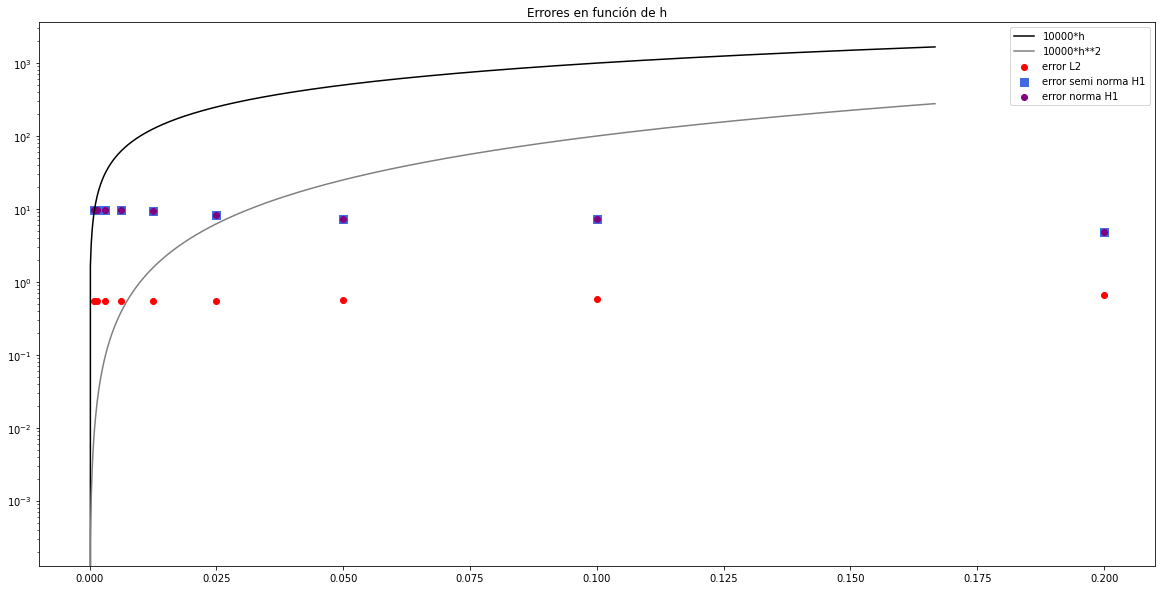

In [90]:
f = lambda x: 1
Ns=[5,10,20,40,80,160,320,640,1280]
eps=0.01
tabulador(eps, Ns, f)

El resultado obtenido no es el esperado, lo que deberíamos observar según las soluciones graficadas es que los errores desciendan a medida que el h disminuye, pues nuestra solución se hace cada vez mejor.

Además, la teoría nos dice que el error según la norma de $L_2$ (puntos rojos) debería descender por debajo de cierta curva $C_2*h^2$, pero esto no se observa en nuestro gráfico aún para $C_2=10000$, algo análogo debería ocurrir para el error asociado a la seminorma de $H_1$ y la curva $C_1*h$, pero tampoco ocurre.

Puede que el resultado obtenido se deba a un error al programar las sumas que aproximan los errores, también puede deberse a la  forma que posee la solución, cerca de 1 la derivada de la función varía mucho, esto puede provocar que diferencias pequeñas entre la solución teórica y numérica incrementen mucho el error de sus derivadas.

### **Ejercicio 3:** 
Considere $f\equiv1$, $a=0$, $b=1$ y $\Omega=\left(  0,1\right)  $.

Para $u_{\alpha}=1, u_{\beta}=0$, la solución analítica de $\textbf{(P)}$ es única e igual a la
función
$$
u(x)=1-\dfrac
{\sinh\left(\varepsilon^{\frac{-1}{2}}x\right)  }{\sinh\left(\varepsilon^{\frac{-1}{2}}\right)}\hspace{1cm} \forall x\in\left[  0,1\right] 
$$

a. Para una discretización uniforme con $N \in \{5, 10, 20, 40, 80\}$ elementos (es decir, $h_j = h = \frac{1}{N+1}$), calcule la solución numérica cuando $\varepsilon = 1$. Grafique todas las soluciones numéricas y la solución analítica (esta última discretizada en una gran cantidad de puntos equiespaciados) en una misma gráfica. Comente sus observaciones.

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


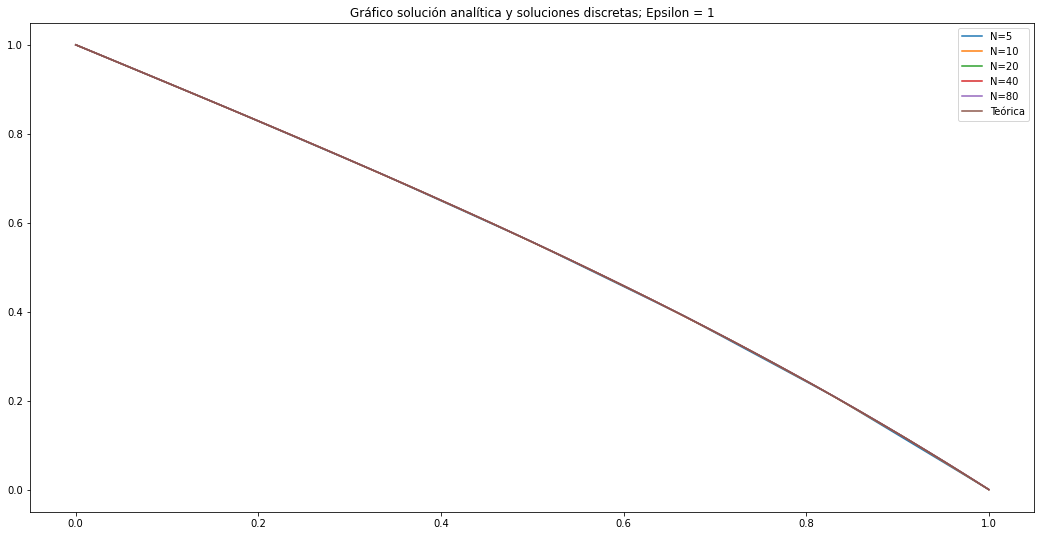

In [ ]:
#Parametros
f=lambda x: 1
a=0
b=1
ualpha=1
ubeta=0
N=[5,10,20,40,80]
eps=1
sol_an = lambda x: 1 - np.sinh(x*eps**(-1/2)) / np.sinh(eps**(-1/2))
X = [np.linspace(a, b, N[0]+2), np.linspace(a, b, N[1]+2), np.linspace(a, b, N[2]+2), np.linspace(a, b, N[3]+2), np.linspace(a, b, N[4]+2),np.linspace(a, b, 1000)]
U = [Resuelve(X[0],ualpha,ubeta,eps,a,b,f), Resuelve(X[1],ualpha,ubeta,eps,a,b,f), Resuelve(X[2],ualpha,ubeta,eps,a,b,f),
     Resuelve(X[3],ualpha,ubeta,eps,a,b,f), Resuelve(X[4],ualpha,ubeta,eps,a,b,f)]

### Gráfico ###
fig = plt.figure(figsize=(18, 9))
plt.plot(X[0], U[0], label= 'N=5')
plt.plot(X[1], U[1], label= 'N=10')
plt.plot(X[2], U[2], label= 'N=20')
plt.plot(X[3], U[3], label= 'N=40')
plt.plot(X[4], U[4], label= 'N=80')
plt.plot(X[5], sol_an(X[5]), label= 'Teórica')
plt.title('Gráfico solución analítica y soluciones discretas; Epsilon = 1')
plt.legend()

Se puede observar como, independientemente de la discretización (es decir, valores de $N$), la diferencia entre la solución analítica y la solución discretizada es inapreciable. Esto es cuando $\varepsilon=1$

b. Repita lo anterior para $\varepsilon = 10^{−j}$ , con $j \in \{1, 2, 3\}$ y $N \in \{10, 25, 50, 100, 250, 500, 1000\}$. Gráfique los tres primeros valores de $N$ en una figura, los dos siguientes en una distinta y los últimos dos en otra. 
    
    Comente sus observaciones.

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


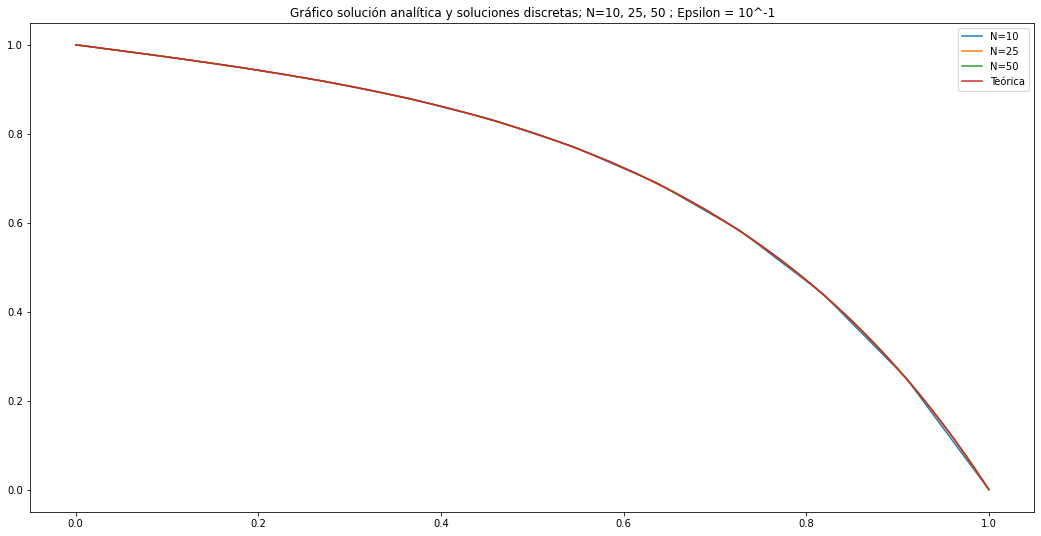

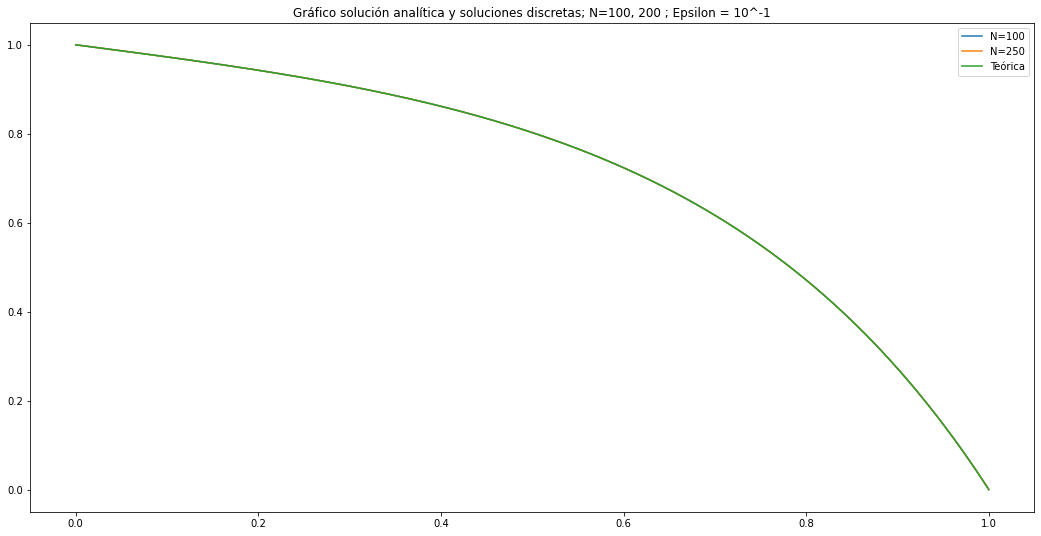

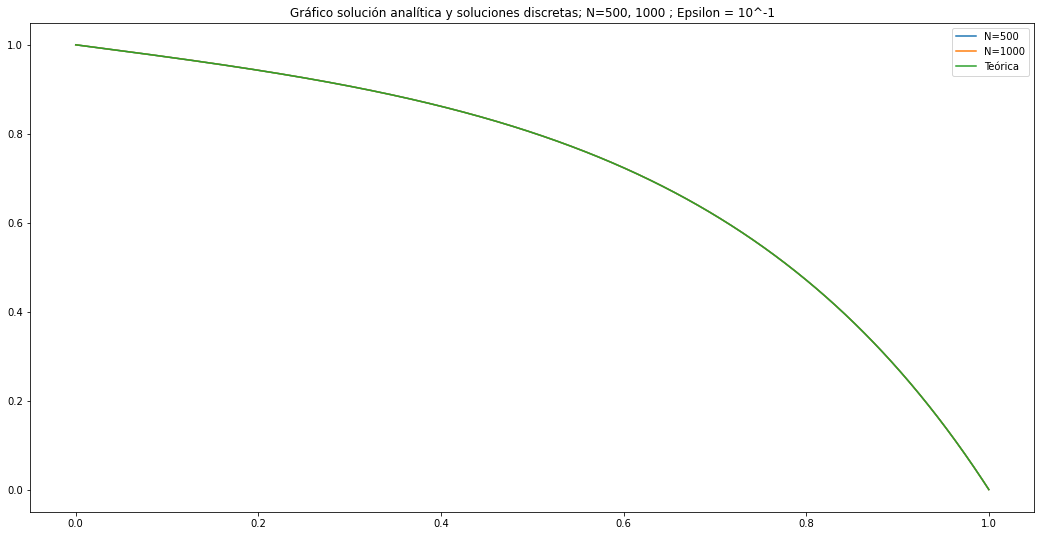

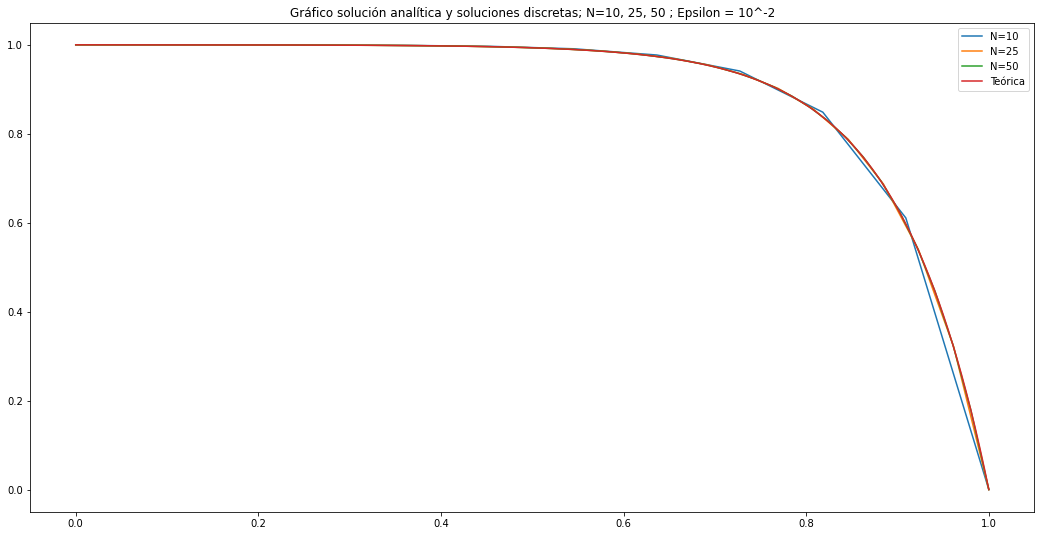

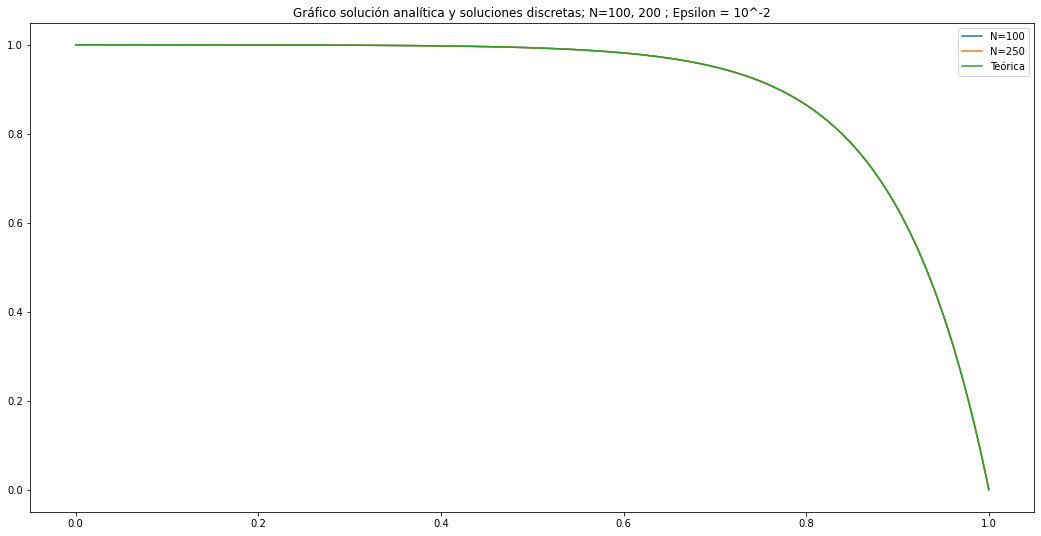

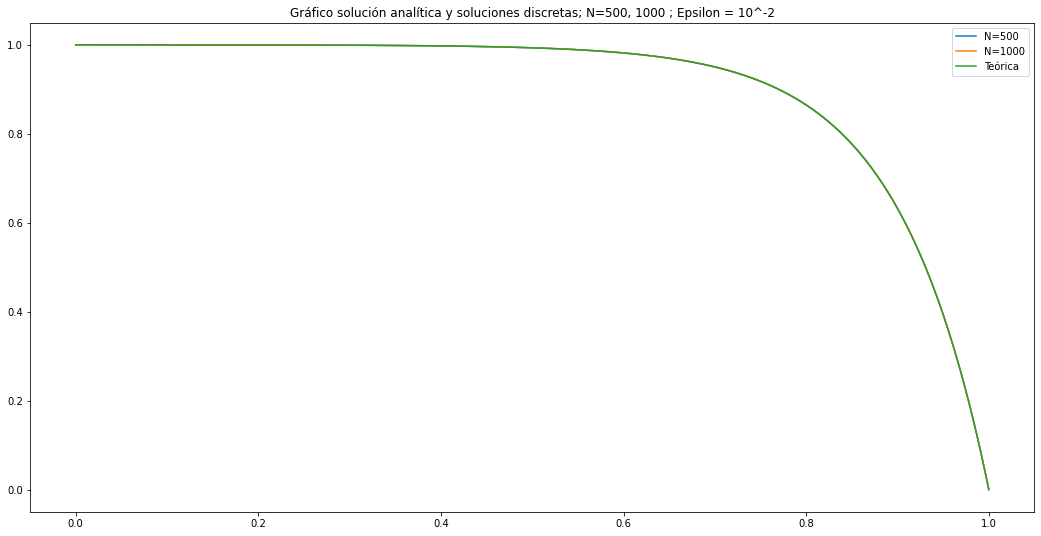

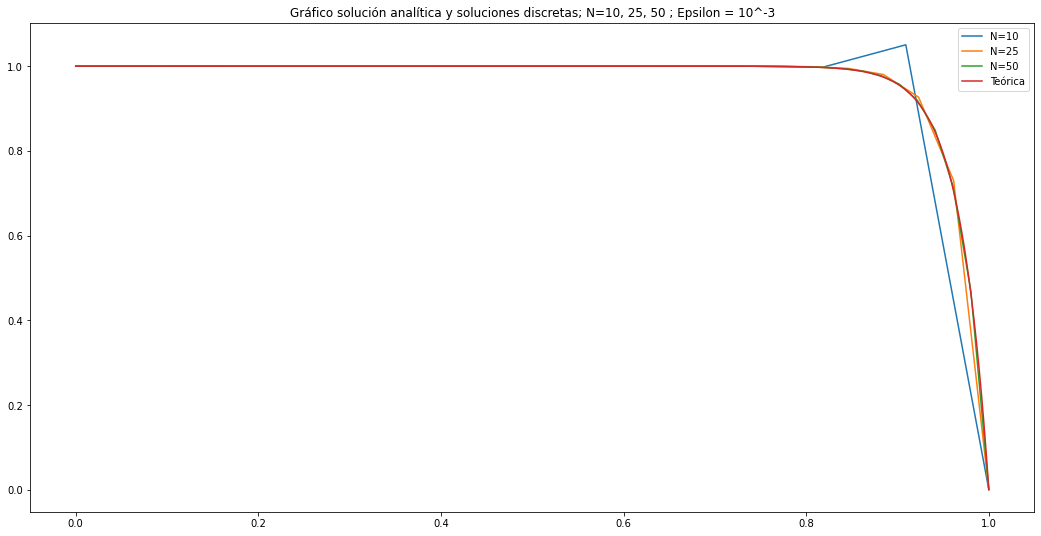

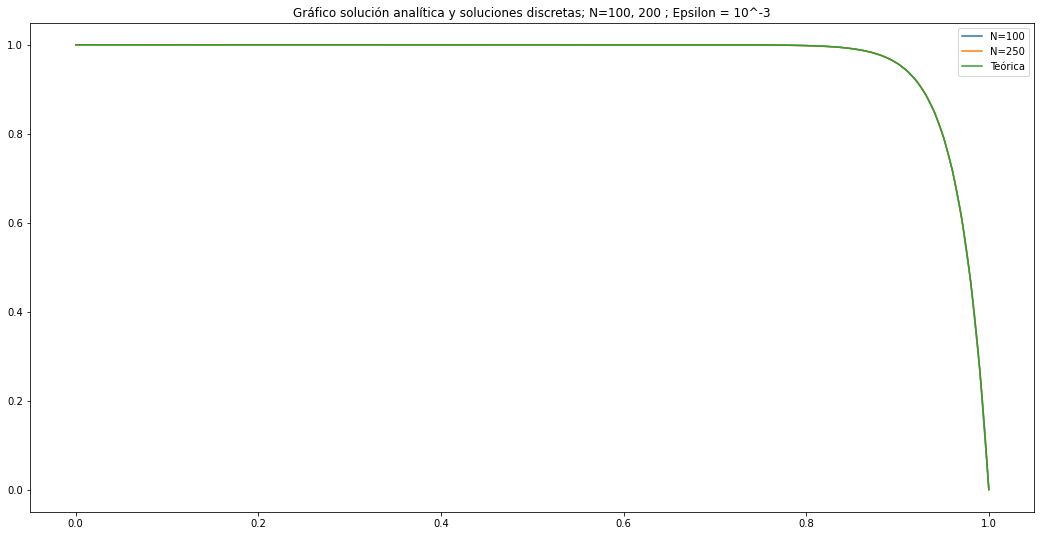

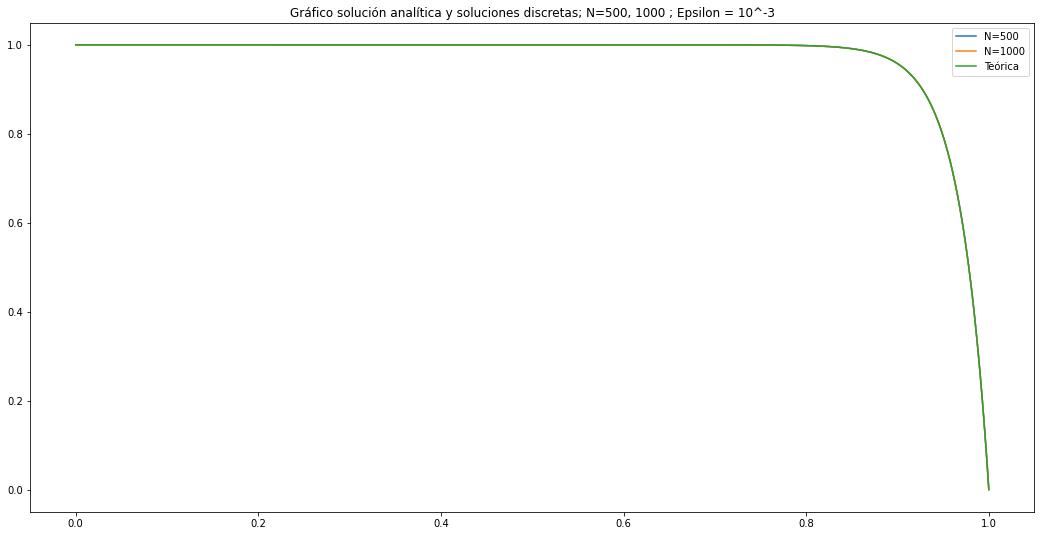

In [27]:
for j in [1,2,3]:
  f=lambda x: 1
  a=0
  b=1
  ualpha=1
  ubeta=0
  N=[10, 25, 50, 100, 250, 500, 1000]
  eps=10**(-j)
  sol_an = lambda x: 1 - np.sinh(x*eps**(-1/2)) / np.sinh(eps**(-1/2))
  # se cambiará a 10.000 para graficar la solución analítica
  X = [np.linspace(a, b, N[0]+2), np.linspace(a, b, N[1]+2), np.linspace(a, b, N[2]+2), np.linspace(a, b, N[3]+2),
     np.linspace(a, b, N[4]+2), np.linspace(a, b, N[5]+2), np.linspace(a, b, N[6]+2), np.linspace(a, b, 10000)]
  U = [Resuelve(X[0],ualpha,ubeta,eps,a,b,f), Resuelve(X[1],ualpha,ubeta,eps,a,b,f), Resuelve(X[2],ualpha,ubeta,eps,a,b,f),
      Resuelve(X[3],ualpha,ubeta,eps,a,b,f), Resuelve(X[4],ualpha,ubeta,eps,a,b,f), Resuelve(X[5],ualpha,ubeta,eps,a,b,f), Resuelve(X[6],ualpha,ubeta,eps,a,b,f)]
  
  #### Gráficos ####
  fig = plt.figure(figsize=(18, 9))
  plt.plot(X[0], U[0], label= 'N=10')
  plt.plot(X[1], U[1], label= 'N=25')
  plt.plot(X[2], U[2], label= 'N=50')
  plt.plot(X[7], sol_an(X[7]), label= 'Teórica')
  plt.title('Gráfico solución analítica y soluciones discretas; N=10, 25, 50 ; Epsilon = 10^'+ str(-j))
  plt.legend()
  ############
  fig = plt.figure(figsize=(18, 9))
  plt.plot(X[3], U[3], label= 'N=100')
  plt.plot(X[4], U[4], label= 'N=250')
  plt.plot(X[7], sol_an(X[7]), label= 'Teórica')
  plt.title('Gráfico solución analítica y soluciones discretas; N=100, 200 ; Epsilon = 10^'+ str(-j))
  plt.legend()
  ############
  fig = plt.figure(figsize=(18, 9))
  plt.plot(X[5], U[5], label= 'N=500')
  plt.plot(X[6], U[6], label= 'N=1000')
  plt.plot(X[7], sol_an(X[7]), label= 'Teórica')
  plt.title('Gráfico solución analítica y soluciones discretas; N=500, 1000 ; Epsilon = 10^'+ str(-j))
  plt.legend()

Al observar los gráficos, se puede ver que, para los casos $N=100, 250, 500$ y $1000$, independiemente de los valores de $\varepsilon$, la solución discretizada es suficientemente buena pues no se perciben diferencias entre esta y la solución analítica en los gráficos.  
Por otro lado, para discretizaciones con valores de $N= 10, 25$ y $50$, a medida que $\varepsilon$ va decreciendo, las soluciones discretas presentan más errores. Donde más se puede apreciar esto último es en el caso $N=10$ y $\varepsilon = 10^{-3}$.

c. Considere ahora $\varepsilon = 10^{-4}$ y una discretización uniforme con $N \in \{5, 10, 20, 40, 80, 160, 320, 640, 1280\}$ elementos (es decir, $h_j = h = \frac{1}{N+1}$). Estime el error en las normas $L^2(\Omega)$, $H^1(\Omega)$ y en la seminorma de $H^1(\Omega)$, grafíquelos y tabúlelos en función de $h$. Para ello, cree una función que permita obtener esos errores. Dicha función debe tener como entradas la discretización del dominio, el vector solución del primer ejercicio, la solución real y su derivada. Las salidas deben ser las normas del error en los espacios $L^2(\Omega)$ y $H^1(\Omega)$, y la seminorma del error en el espacio $H^1(\Omega)$. 

    Comente sus resultados.
    
    **Indicación:** Puede ser útil usar escala logarítmica para la gráfica de errores. Asimismo, puede resultar útil usar curvas de la forma $Ch$ o $Ch^2$ para comparar las curvas de error con sus respectivos ordenes de convergencia.

Considere $f\equiv1$, $a=0$, $b=1$ y $\Omega=\left(  0,1\right)  $.

Para $u_{\alpha}=1, u_{\beta}=0$, la solución analítica de $\textbf{(P)}$ es única e igual a la
función
$$
u(x)=1-\dfrac
{\sinh\left(\varepsilon^{\frac{-1}{2}}x\right)  }{\sinh\left(\varepsilon^{\frac{-1}{2}}\right)}\hspace{1cm} \forall x\in\left[  0,1\right] 
$$

In [69]:
#N es el numero de intervalos de la discretizacion
def error_norma2(u_teo,u_disc,N):
  error=0
  h=1/(N+1)
  xdisc = np.linspace(0, 1, N+2)
  for i in range(N+1):
    error+=(h/6)*((u_teo(xdisc[i])-u_disc[i])**2+4*(u_teo((xdisc[i]+xdisc[i+1])/2)-(u_disc[i]+u_disc[i+1])/2)**2+ (u_teo(xdisc[i+1])-u_disc[i+1])**2)
  return np.sqrt(error)

def error_semi_norma1(u_teo,u_disc,derivada,N):
  error=0
  h=1/(N+1)
  xdisc = np.linspace(0, 1, N+2)
  for i in range(N+1):
    error += h*(derivada((xdisc[i]+xdisc[i+1])/2) - (u_disc[i+1]-u_disc[i])/h)**2
  return np.sqrt(error)

def error_norma_H1(u_teo,u_disc,derivada,N):
  return np.sqrt(error_norma2(u_teo,u_disc,N)**2+error_semi_norma1(u_teo,u_disc,derivada,N)**2)

def calcular_errores(eps, Ns, f):
  """Calcula el error de la solucion al problema (2) para una lista de valores de N"""
  errorL2=[]
  errorsemiH1=[]
  errorH1=[]

  hs=[]
  a=0
  b=1
  ualpha=1
  ubeta=0
  for N in Ns:
    
    u_teo = lambda x: 1 - (np.sinh(eps**(-1/2)*x)/np.sinh(eps**(-1/2)))
    derivada = lambda x: -eps**(-1/2)*(np.cosh(eps**(-1/2)*x)/np.sinh(eps**(-1/2)))
    xdisc = np.linspace(a, b, N+2)

    u_disc = Resuelve(xdisc,ualpha,ubeta,eps,a,b,f)

    errorL2.append(error_norma2(u_teo,u_disc,N))
    errorsemiH1.append(error_semi_norma1(u_teo,u_disc,derivada,N))
    errorH1.append(error_norma_H1(u_teo,u_disc,derivada,N))
    hs.append(1/(N+1))

  return hs, errorL2, errorsemiH1, errorH1


In [80]:
def tabulador(eps, Ns, f):
  hs, errorL2, errorsemiH1, errorH1 = calcular_errores(eps, Ns, f)
  d = {'h': hs, 'error L2': errorL2, 'error semi norma H1': errorsemiH1, 'error norma H1': errorH1}
  df = pd.DataFrame(data=d)

  fig = plt.figure(figsize=(20, 10))
  plt.scatter(hs, errorL2, label= 'error L2',c='r')
  plt.scatter(hs, errorsemiH1, label= 'error semi norma H1',c='royalblue',s=50,marker=',')
  plt.scatter(hs, errorH1, label= 'error norma H1',c='purple')
  
  h_fino=np.linspace(0, 1/6, 1000)

  #Graficar curvas del tipo C*h y C*h**2
  h_escalado=[6*h for h in h_fino]

  plt.plot(h_fino,h_escalado,c="black",label="6*h")

  hcuadrado=[100*h**2 for h in h_fino]

  plt.plot(h_fino,hcuadrado,c="gray",label="100*h**2")
  plt.yscale( 'log' )
  plt.legend()
  plt.title("Errores en función de h")

  return df

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


,h,error L2,error semi norma H1,error norma H1
0,0.166667,0.142568,3.180319,3.183513
1,0.090909,0.103291,3.909187,3.910552
2,0.047619,0.063221,3.454995,3.455573
3,0.024390,0.027500,1.824257,1.824465
4,0.012346,0.008712,0.626884,0.626945
5,0.006211,0.002355,0.173878,0.173894
6,0.003115,0.000603,0.044831,0.044835
7,0.001560,0.000152,0.011314,0.011315
8,0.000781,0.000038,0.002837,0.002838


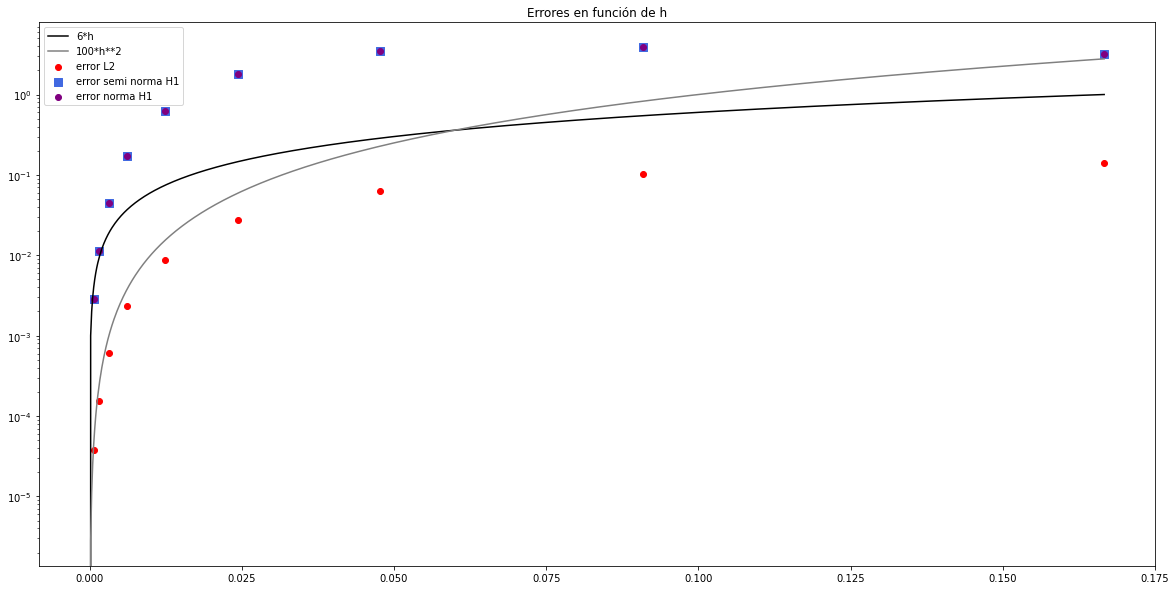

In [81]:
f = lambda x: 1
Ns=[5,10,20,40,80,160,320,640,1280]
eps=10**(-4)
tabulador(eps, Ns, f)

Aquí se puede observar un comportamiento de los errores congruente a lo que dice la teoría, a medida que el h disminuye, todos los errores disminuyen, además al graficar las curvas del tipo $C_1*h$ y $C_2*h^2$, con $C_1,C_2$ aproximados a partir del gráfico, podemos observar como el error de la norma en $L_2$ empieza a descender asintóticamente cerca de la curva $C_2*h^2$ (gris).

Análogamente, el error asociado a la seminorma en el espacio $H_1$ tiende a acercarse a la curva $C_1*h$, ambos comportamientos son los que deberíamos obtener según la teoría, pues estas curvas para cierta constante actuan como una cota superior de los errores respectivos.

Cabe destacar que en el gráfico los errores de la seminorma y la norma en $H_1$ son prácticamente iguales pues el error según la norma de $L_2$ es despreciable en comparación.